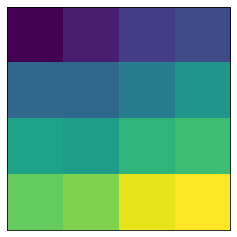

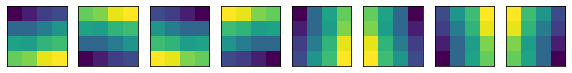

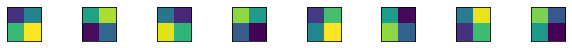

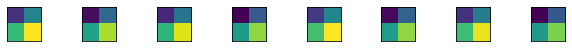

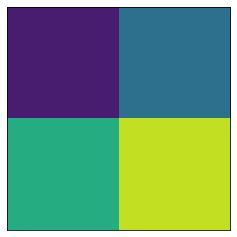

In [4]:
import sys; sys.path.append("..")
import model
import torch 
import matplotlib.pyplot as plt

A = torch.arange(4*4, dtype=torch.double).view(1, 4, 4)
A += (torch.rand(A.shape)*2-1)*1
plt.matshow(A[0,...])
plt.xticks([])
plt.yticks([])
plt.savefig("input.pdf", format="pdf", bbox_inches="tight")
plt.show()

# builds symmetries
A_sym = model.expand_and_apply_symmetries(A, dims=[1,2], nr_symmetries=8)
fig, ax = plt.subplots(1,8,figsize=(10, 3))
for i in range(8):
    ax[i].matshow(A_sym[0,i,...])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.savefig("input_symmetrized.pdf", format="pdf", bbox_inches="tight")
plt.show()


fig, ax = plt.subplots(1,8,figsize=(10, 3),gridspec_kw={"wspace":1.2})
w = torch.tensor([[-.1, .1, -.1],[.1, 1.,.1],[-.1,.1,-.1]], dtype=torch.double).view(1,1,3,3)
w += (torch.rand(w.shape)*2-1)*.06
f = torch.nn.functional.conv2d(A_sym.permute(1,0,2,3), weight=w, stride=[1,1])
f = f.permute(1,0,2,3)

for i in range(8):
    ax[i].matshow(f[0,i,...], vmin=f.min(), vmax=f.max())
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.savefig("output_symmetrized.pdf", format="pdf", bbox_inches="tight")
plt.show()

f_hat = model.apply_symmetries(f, dims=[1,2], inv=True)
fig, ax = plt.subplots(1,8,figsize=(10, 3),gridspec_kw={"wspace":1.2})
for i in range(8):
    ax[i].matshow(f_hat[0,i,...], vmin=f.min(), vmax=f.max())
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.savefig("output_reverted.pdf", format="pdf", bbox_inches="tight")
plt.show()

f_agg = f_hat.mean(dim=1).view(2,2)
plt.matshow(f_agg, vmin=f.min(), vmax=f.max())
plt.xticks([])
plt.yticks([])
plt.savefig("output.pdf", format="pdf", bbox_inches="tight")
plt.show()